In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load Dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
# Data Preparation
X = df.drop(columns=["fetal_health"])
y = df["fetal_health"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Models
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [10]:
# Train Models
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [11]:
# Train Models
ab = AdaBoostClassifier(random_state=42).fit(X_train, y_train)

C:\Users\17147\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [12]:
# Soft Voting Classifier
models = [("Random Forest", rf), ("Decision Tree", dt), ("AdaBoost", ab)]
f1_scores = [f1_score(y_train, model.predict(X_train), average="macro") for name, model in models]
weights = [score / sum(f1_scores) for score in f1_scores]

svc = VotingClassifier(estimators=models, voting='soft', weights=weights).fit(X_train, y_train)

C:\Users\17147\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


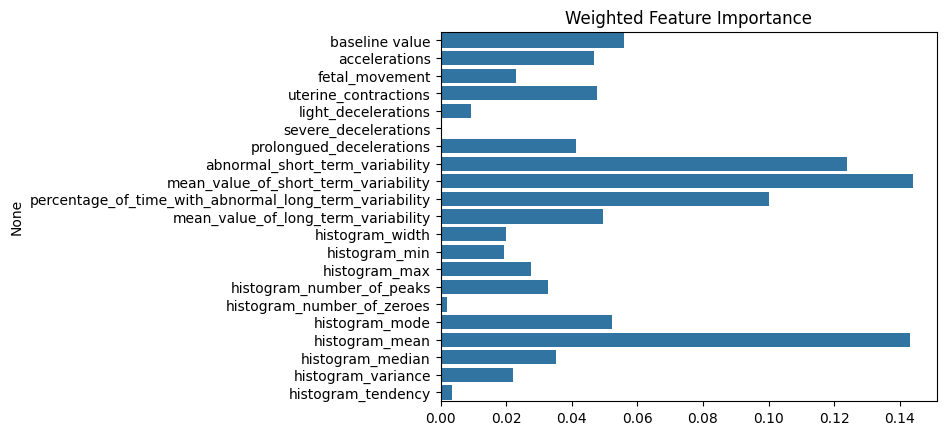

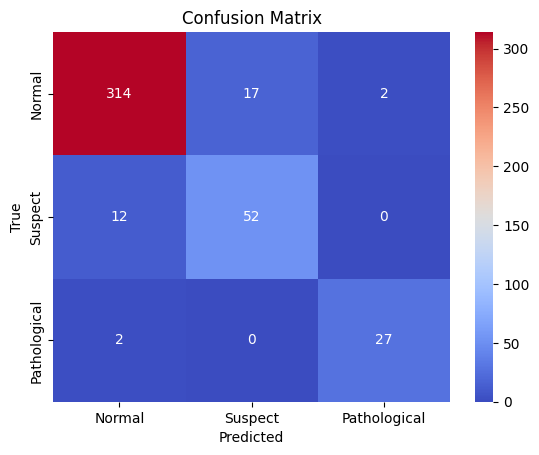

              precision    recall  f1-score   support

      Normal       0.96      0.94      0.95       333
     Suspect       0.75      0.81      0.78        64
Pathological       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



In [15]:
# Predictions
y_pred = svc.predict(X_test)

# Visualizations
# Feature Importances
importances = sum(weight * model.feature_importances_ for model, weight in zip([rf, dt, ab], weights))
sns.barplot(x=importances, y=X.columns)
plt.title("Weighted Feature Importance")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Normal", "Suspect", "Pathological"], yticklabels=["Normal", "Suspect", "Pathological"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Normal", "Suspect", "Pathological"]))